# Import initial libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Dataset
 Name : Cifar-10
 
 Type : Image (RGB)
 
 Task : Multi-class(10) classification
 
 description: The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()


170498071/170498071 [==============================] - 6s 0us/step


# EDA

In [4]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


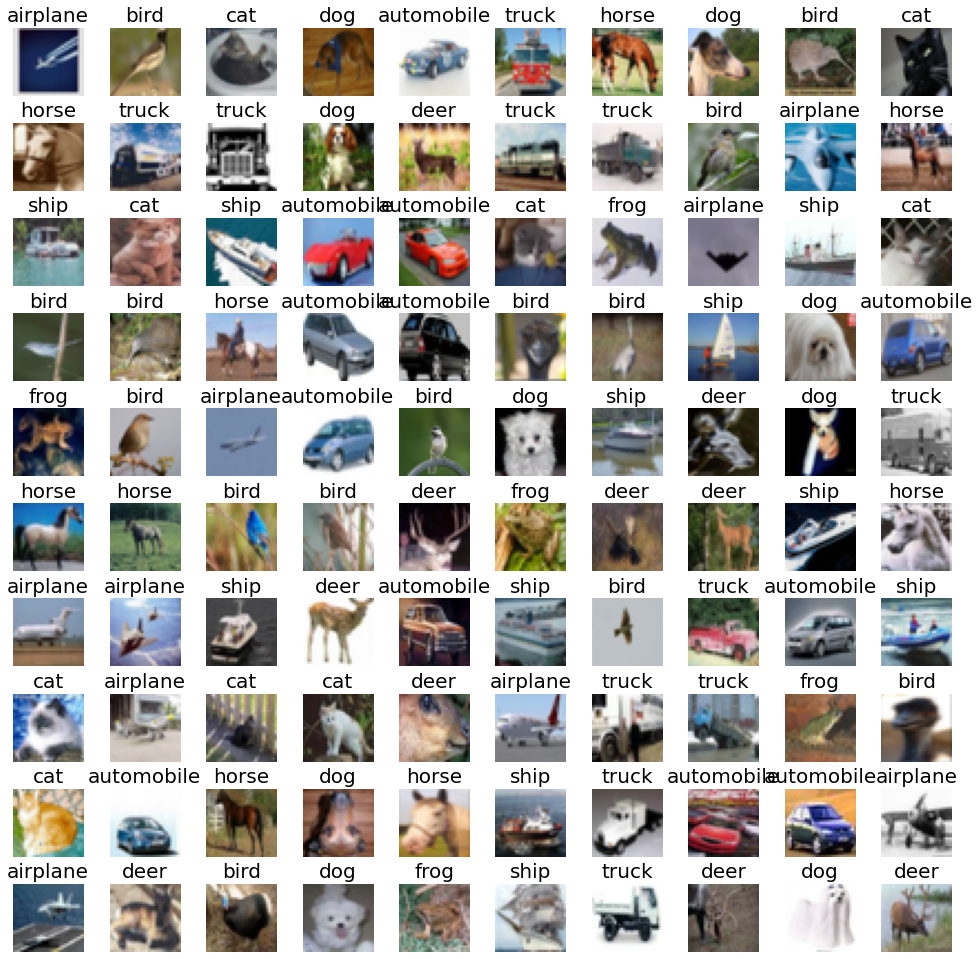

In [22]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
          'dog', 'frog', 'horse', 'ship', 'truck']
W_grid = 10
L_grid = 10


fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() 

n_train = len(X_train) 

for i in np.arange(0, W_grid * L_grid): 

    index = np.random.randint(0, n_train)
    axes[i].imshow(X_train[index,1:])
    label_index = int(y_train[index])
    axes[i].set_title(labels[label_index], fontsize = 20)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

Text(0.5, 1.0, 'Class distribution in training set')

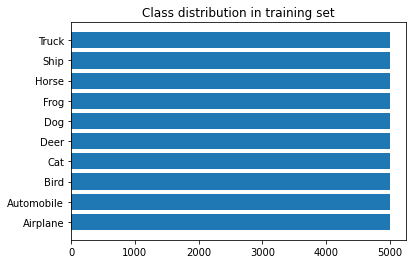

In [ ]:
classes_name = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

classes, counts = np.unique(y_train, return_counts=True)
plt.barh(classes_name, counts)
plt.title('Class distribution in training set')

# Data Preprocessing

## Scaling the matrices:

In [5]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

## OneHotEncoding dor labels:

In [6]:
from tensorflow.keras.utils import to_categorical

In [7]:
y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)

# CNN Model

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# from sklearn.metrics import ConfusionMatrixDisplay
# from sklearn.metrics import classification_report, confusion_matrix

In [9]:
def plot_history(history, title):
    
    plt.figure(figsize=(15,7))
    # Plot training & validation accuracy values
    plt.subplot(121)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(122)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

In [10]:
cnn = Sequential()
cnn.add(Conv2D(64, (3,3), input_shape=(32,32,3), activation='relu'))
cnn.add(Dropout(0.2))

cnn.add(Conv2D(64, (3,3), activation='relu'))
cnn.add(Dropout(0.2))

cnn.add(Conv2D(64, (3,3), activation='relu'))
cnn.add(Dropout(0.2))

cnn.add(Flatten())
cnn.add(Dense(128, activation='relu'))
cnn.add(Dense(10, activation='softmax'))

In [11]:
METRICS = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=METRICS)


In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 dropout (Dropout)           (None, 30, 30, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 dropout_1 (Dropout)         (None, 28, 28, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 64)        36928     
                                                                 
 dropout_2 (Dropout)         (None, 26, 26, 64)        0         
                                                                 
 flatten (Flatten)           (None, 43264)             0

In [14]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [ ]:
BATCH_SIZE = 32
EPOCHS = 10

model_history = cnn.fit(X_train, y_cat_train,
                          epochs = EPOCHS,
                          batch_size = BATCH_SIZE,
                          validation_data = (X_test, y_cat_test),
                          callbacks=[early_stop])

Epoch 1/10
1563/1563 [==============================] - 30s 13ms/step - loss: 1.4338 - accuracy: 0.4796 - precision: 0.6921 - recall: 0.2757 - val_loss: 1.2097 - val_accuracy: 0.5750 - val_precision: 0.7259 - val_recall: 0.4245
Epoch 2/10
1563/1563 [==============================] - 20s 13ms/step - loss: 1.0356 - accuracy: 0.6336 - precision: 0.7624 - recall: 0.5034 - val_loss: 0.9977 - val_accuracy: 0.6471 - val_precision: 0.7703 - val_recall: 0.5318
Epoch 3/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.8387 - accuracy: 0.7054 - precision: 0.8025 - recall: 0.6118 - val_loss: 0.9663 - val_accuracy: 0.6696 - val_precision: 0.7676 - val_recall: 0.5847
Epoch 4/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.6906 - accuracy: 0.7552 - precision: 0.8265 - recall: 0.6850 - val_loss: 0.9462 - val_accuracy: 0.6814 - val_precision: 0.7613 - val_recall: 0.6151
Epoch 5/10
1563/1563 [==============================] - 18s 11ms/step - loss: 0.5513 - a

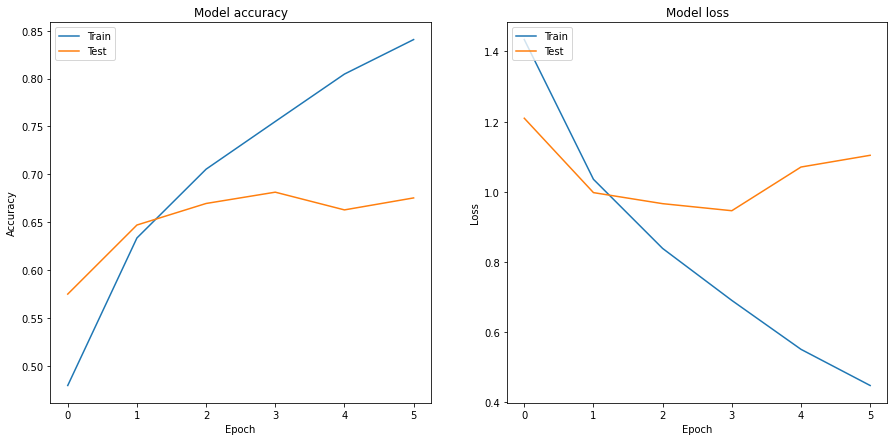

In [ ]:
plot_history(model_history, 'CNN model')


In [ ]:
cnn.save("/content/model")

In [ ]:
!zip -r /content/model.zip /content/model

  adding: content/model/ (stored 0%)
  adding: content/model/assets/ (stored 0%)
  adding: content/model/variables/ (stored 0%)
  adding: content/model/variables/variables.index (deflated 67%)
  adding: content/model/variables/variables.data-00000-of-00001 (deflated 25%)
  adding: content/model/saved_model.pb (deflated 88%)
  adding: content/model/keras_metadata.pb (deflated 91%)


# Extract miss classifications

In [28]:
def evaluation_model(model, X_train, X_test, y_train, y_test):
  predictions = model.predict(X_test)
  predict_class = np.argmax(predictions, axis=1)
  predict_class = predict_class.tolist()
  predict_class = np.array(predict_class)
  y_test = y_test.reshape(1, -1)[0]
    
  miss_x_test = []
  miss_y_test = []
  for i in range(y_test.shape[0]):
    if y_test[i] != predict_class[i]:
      miss_x_test.append(X_test[i])
      miss_y_test.append((y_test[i], predict_class[i]))
  
  
  predictions = model.predict(X_train)
  predict_class = np.argmax(predictions, axis=1)
  predict_class = predict_class.tolist()
  predict_class = np.array(predict_class)
  y_train = y_train.reshape(1, -1)[0]
  
  miss_x_train = []
  miss_y_train = []
  for i in range(y_test.shape[0]):
    if y_train[i] != predict_class[i]:
      miss_x_train.append(X_train[i])
      miss_y_train.append((y_train[i], predict_class[i]))

  miss_count_per_class_train = {label:0 for label in labels}
  for miss in miss_y_train:
    miss_count_per_class_train[labels[miss[0]]] += 1

  print (miss_count_per_class_train)
  miss_count_per_class_test = {label:0 for label in labels}
  for miss in miss_y_test:
    miss_count_per_class_test[labels[miss[0]]] += 1
  
  return (miss_count_per_class_train, miss_count_per_class_test) , ((miss_x_train, miss_y_train), (miss_x_test, miss_y_test))

def miss_plot(miss1, miss2):
    plt.figure(figsize=(15,7))

    data = miss1
    names = list(data.keys())
    values = list(data.values())
    X_axis = np.arange(len(data))
    plt.bar(X_axis + 0.2, values,0.4, tick_label=names, label = "train data")
    
    data = miss2
    names = list(data.keys())
    values = list(data.values())

    X_axis = np.arange(len(data))
    plt.bar(X_axis - 0.2, values,0.4,  tick_label=names, label = "test data")
    
    plt.xticks(X_axis, names)
    plt.xlabel("Groups")
    plt.ylabel("Number of miss classification")
    plt.title("Number of miss classification in each group")
    plt.legend()
    
    plt.show()

In [ ]:
miss_count_train, miss_count_test = evaluation_model(cnn, X_train, X_test, y_train, y_test)

1563/1563 [==============================] - 4s 3ms/step
{'airplane': 76, 'automobile': 90, 'bird': 88, 'cat': 95, 'deer': 69, 'dog': 183, 'frog': 50, 'horse': 31, 'ship': 31, 'truck': 11}


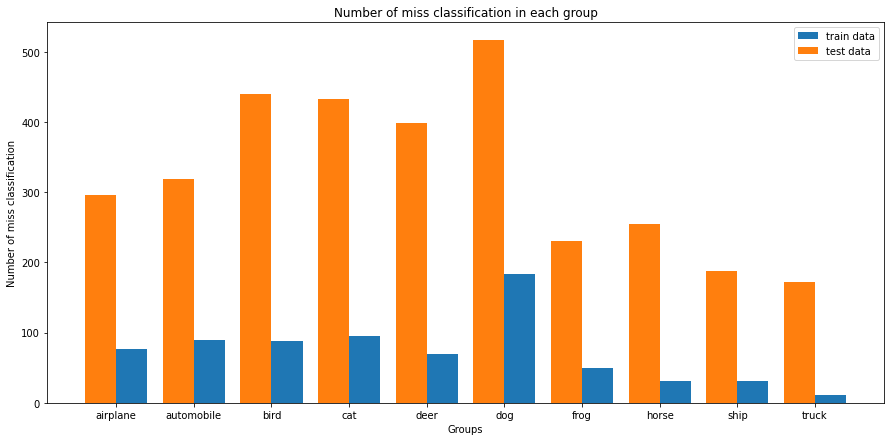

In [ ]:
miss_plot(miss_count_train, miss_count_test)

# DenseNet model

In [20]:
from keras.applications.densenet import DenseNet121
model = Sequential()
base_model = DenseNet121(input_shape=(32, 32, 3), include_top=False, weights='imagenet', pooling='avg')
model.add(base_model)
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])

r = model.fit(X_train_scaled, y_cat_train, 
              epochs=100,
              batch_size=128,
              validation_data=(X_test_scaled, y_cat_test), 
                callbacks=[early_stop],
             )

Epoch 1/100
391/391 [==============================] - 59s 95ms/step - loss: 0.9452 - accuracy: 0.6917 - val_loss: 2.2493 - val_accuracy: 0.6998
Epoch 2/100
391/391 [==============================] - 30s 78ms/step - loss: 0.5338 - accuracy: 0.8184 - val_loss: 1.2243 - val_accuracy: 0.6240
Epoch 3/100
391/391 [==============================] - 30s 78ms/step - loss: 0.4036 - accuracy: 0.8622 - val_loss: 0.6647 - val_accuracy: 0.7868
Epoch 4/100
391/391 [==============================] - 30s 78ms/step - loss: 0.3070 - accuracy: 0.8942 - val_loss: 0.8810 - val_accuracy: 0.7301
Epoch 5/100
391/391 [==============================] - 31s 79ms/step - loss: 0.2409 - accuracy: 0.9173 - val_loss: 0.8902 - val_accuracy: 0.7679


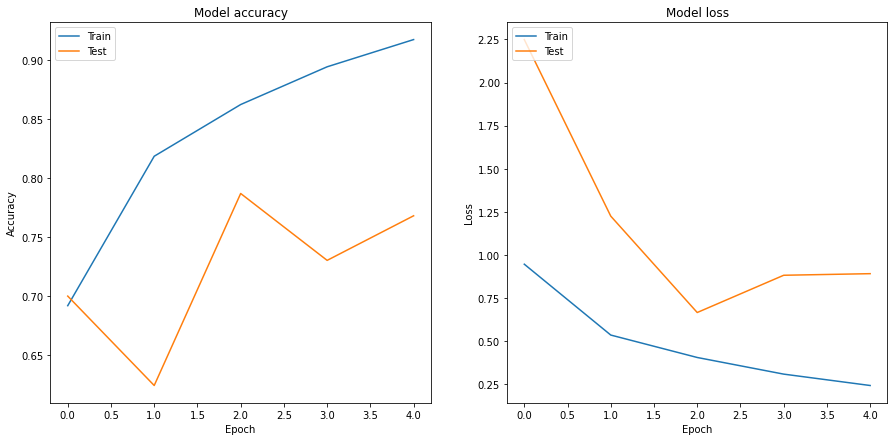

In [21]:
plot_history(r, 'DenseNet model')


In [29]:
(miss_count_train, miss_count_test), (miss_train, miss_test) = evaluation_model(model, X_train_scaled, X_test_scaled, y_train, y_test)

1563/1563 [==============================] - 20s 13ms/step
{'airplane': 124, 'automobile': 13, 'bird': 55, 'cat': 480, 'deer': 123, 'dog': 365, 'frog': 15, 'horse': 50, 'ship': 80, 'truck': 91}


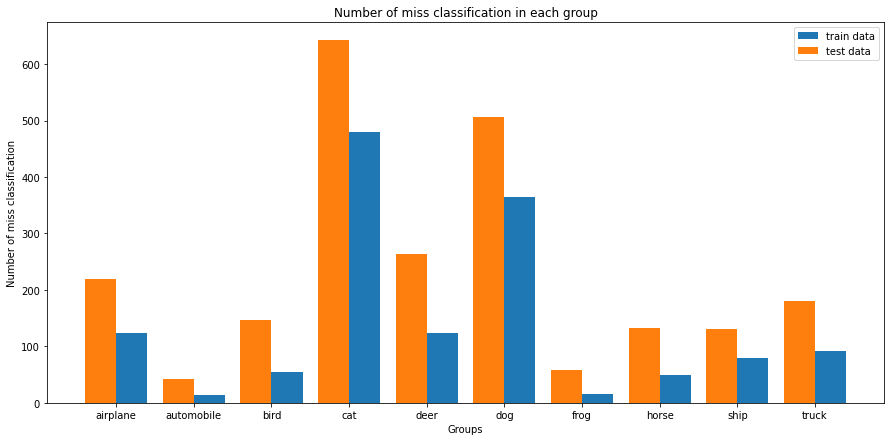

In [30]:
miss_plot(miss_count_train, miss_count_test)

What if we train the model with out stopping it after some amount of epochs

In [ ]:
model = Sequential()
base_model = DenseNet121(input_shape=(32, 32, 3), include_top=False, weights='imagenet', pooling='avg')
model.add(base_model)
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

r = model.fit(X_train, y_cat_train, 
              epochs=20,
              batch_size=100,
              validation_data=(X_test, y_cat_test), 
             )

Epoch 1/20
500/500 [==============================] - 41s 62ms/step - loss: 0.9614 - accuracy: 0.6815 - val_loss: 1.1440 - val_accuracy: 0.6888
Epoch 2/20
500/500 [==============================] - 29s 58ms/step - loss: 1.1043 - accuracy: 0.6259 - val_loss: 12.7320 - val_accuracy: 0.5360
Epoch 3/20
500/500 [==============================] - 35s 71ms/step - loss: 0.8283 - accuracy: 0.7195 - val_loss: 0.7547 - val_accuracy: 0.7463
Epoch 4/20
500/500 [==============================] - 30s 60ms/step - loss: 0.5678 - accuracy: 0.8043 - val_loss: 0.6499 - val_accuracy: 0.7809
Epoch 5/20
500/500 [==============================] - 29s 58ms/step - loss: 0.4616 - accuracy: 0.8419 - val_loss: 0.6081 - val_accuracy: 0.7940
Epoch 6/20
500/500 [==============================] - 31s 62ms/step - loss: 0.3761 - accuracy: 0.8693 - val_loss: 0.6964 - val_accuracy: 0.7673
Epoch 7/20
500/500 [==============================] - 30s 60ms/step - loss: 0.4036 - accuracy: 0.8623 - val_loss: 20.8043 - val_accurac

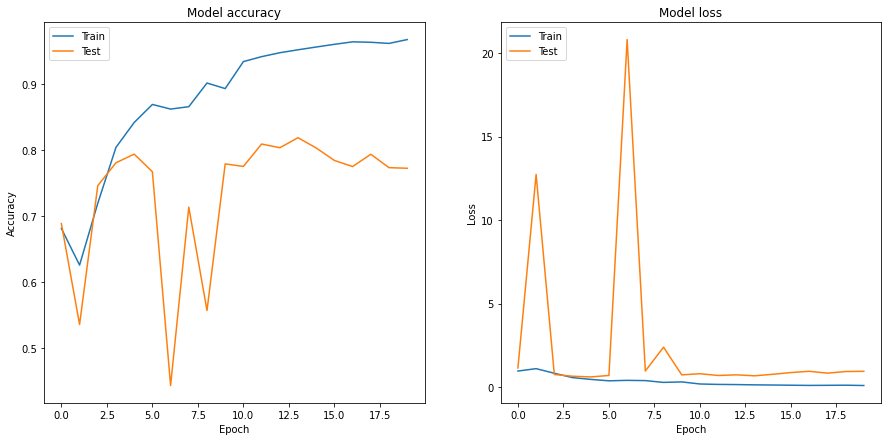

In [ ]:
plot_history(r, 'DenseNet model with 20 epochs')


In [ ]:
miss_count_train, miss_count_test = evaluation_model(model, X_train, X_test, y_train, y_test)

1563/1563 [==============================] - 22s 14ms/step
{'airplane': 50, 'automobile': 46, 'bird': 74, 'cat': 205, 'deer': 126, 'dog': 104, 'frog': 41, 'horse': 95, 'ship': 82, 'truck': 152}


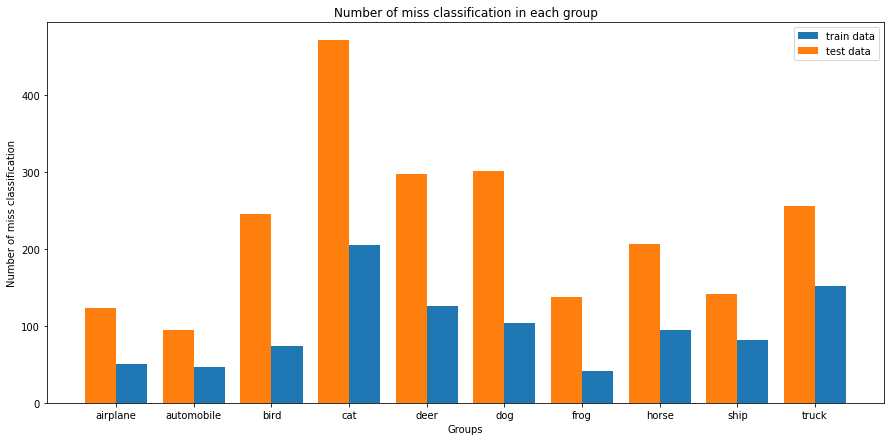

In [ ]:
miss_plot(miss_count_train, miss_count_test)

# Use T-SNE embedding for clustering

In [41]:
miss_x_train = np.array(miss_train[0])
miss_y_train = miss_train[1]
miss_y_train_true = [i for (i, j) in miss_y_train]
miss_y_train_false = [j for (i, j) in miss_y_train]

miss_x_test = np.array(miss_test[0])
miss_y_test = miss_test[1]
miss_y_test_true = [i for (i, j) in miss_y_test]
miss_y_test_false = [j for (i, j) in miss_y_test]


In [55]:
from sklearn.manifold import TSNE
tsne = TSNE(
        n_components=2,
        n_iter=500,
        n_iter_without_progress=150,
        n_jobs=2,
        random_state=0,
    )
projections = mnist_tr = tsne.fit_transform(miss_x_test.reshape(miss_x_test.shape[0], 32 * 32 * 3))

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [56]:
cps_df = pd.DataFrame(columns=['CP1', 'CP2', 'target'],
                       data=np.column_stack((projections, 
                                            miss_y_test_true)))# cast targets column to int
cps_df.loc[:, 'target'] = cps_df.target.astype(int)
cps_df.head()

,CP1,CP2,target
0,12.702043,17.507387,8
1,14.911283,13.846770,8
2,8.850719,17.797079,0
3,-9.912716,9.984431,3
4,-2.446177,-17.401003,5


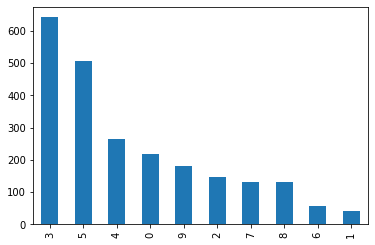

In [57]:
cps_df.target.value_counts().plot(kind='bar')

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


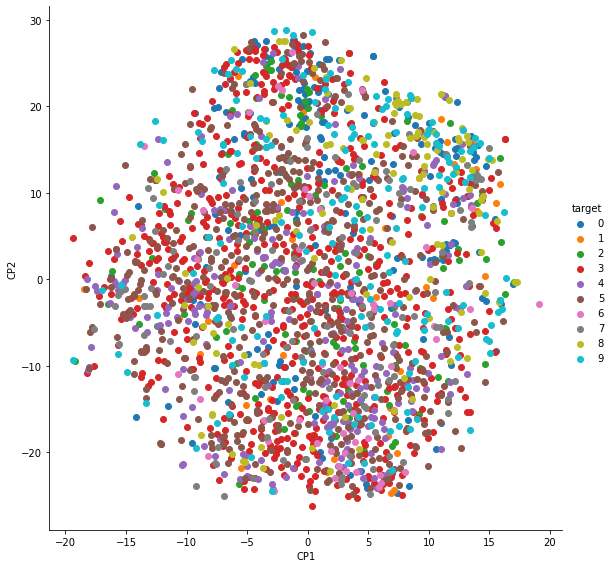

In [58]:
grid = sns.FacetGrid(cps_df, hue="target", size=8)
grid.map(plt.scatter, 'CP1', 'CP2').add_legend()

In [61]:
projections = mnist_tr = tsne.fit_transform(miss_x_train.reshape(miss_x_train.shape[0], 32 * 32 * 3))
cps_df = pd.DataFrame(columns=['CP1', 'CP2', 'target'],
                       data=np.column_stack((projections, 
                                            miss_y_train_true)))# cast targets column to int
cps_df.loc[:, 'target'] = cps_df.target.astype(int)
cps_df.head()

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


,CP1,CP2,target
0,11.009635,-8.357847,6
1,-8.445577,12.186228,3
2,-7.606998,-7.982563,3
3,6.401850,-12.365300,9
4,4.773253,-9.133153,5


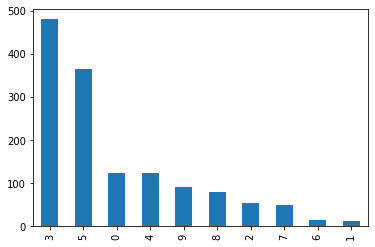

In [62]:
cps_df.target.value_counts().plot(kind='bar')

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


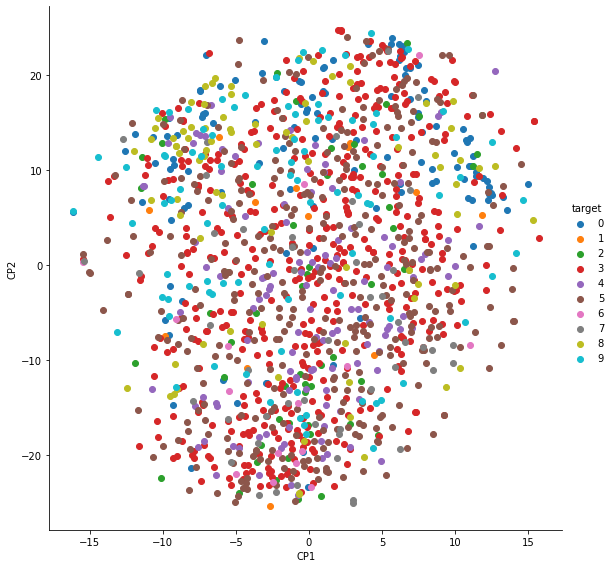

In [63]:
grid = sns.FacetGrid(cps_df, hue="target", size=8)
grid.map(plt.scatter, 'CP1', 'CP2').add_legend()